Load dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats
from sklearn.model_selection import train_test_split
# Load the dataset
Prof_race_data = pd.read_csv("C:/Users/hoonf/OneDrive/Documents/ECE 6254/Data Challenge/race_results.csv")

# Display the data
Prof_race_data




,Date,Race Name,Finish Time (minutes),Start Time,Distance (miles),Elevation Gain (ft),Elevation Loss (ft),Temperature (F),Dew Point (F),Humidity (%),...,Tempo Last 13 Weeks,Tempo Last 52 Weeks,Long runs in last 7 days,Long Last 4 Weeks,Long Last 13 Weeks,Long Last 52 Weeks,Longest run in last 7 days,Longest Last 4 Weeks,Longest Last 13 Weeks,Longest Last 52 Weeks
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4/10/2021,Georgia Tech Pi Mile 5K,18.65,7:55 AM,3.1,152.0,143.0,62.0,58.0,86.0,...,12.0,27.0,0.0,3.0,5.0,5.0,8.00,13.22,13.22,13.22
2,7/3/2021,Peachtree Road Race,38.38,6:30 AM,6.2,240.0,335.0,67.0,63.0,87.0,...,9.0,28.0,0.0,1.0,2.0,6.0,10.00,13.22,13.22,13.22
3,10/16/2021,Mayors 5K on the 5th Runway,17.85,6:30 AM,3.1,0.0,0.0,68.0,64.0,87.0,...,8.0,33.0,0.0,3.0,7.0,13.0,10.75,21.00,21.00,21.00
4,10/23/21,Mercedes-Benz Stadium 5K,17.85,7:15 AM,3.1,137.0,128.0,50.0,46.0,86.0,...,10.0,35.0,0.0,2.0,7.0,13.0,10.75,21.00,21.00,21.00
5,11/25/21,Thanksgiving Day Half Marathon,81.33,7:45 AM,13.1,477.0,498.0,36.0,29.0,76.0,...,17.0,43.0,0.0,4.0,10.0,17.0,12.00,24.01,24.01,24.01
6,2/26/2022,Publix Atlanta Marathon,169.67,7:00 AM,26.2,1379.0,1378.0,38.0,31.0,76.0,...,9.0,42.0,0.0,3.0,9.0,25.0,7.00,22.00,40.00,40.00
7,3/12/2022,Georgia Tech Pi Mile 5K,17.80,7:30 AM,3.1,198.0,197.0,33.0,28.0,82.0,...,10.0,42.0,0.0,2.0,8.0,26.0,4.75,26.56,26.56,40.00
8,5/13/2022,Cruel Jewel 50,999.83,8:00 AM,57.5,17696.0,17696.0,43.0,33.0,68.0,...,7.0,40.0,0.0,5.0,8.0,29.0,6.00,20.00,26.56,40.00
9,10/8/2022,Mayors 5K on the 5th Runway,18.55,6:30 AM,3.1,0.0,0.0,58.0,50.0,75.0,...,10.0,37.0,0.0,0.0,1.0,23.0,8.50,8.50,13.66,58.25


Outlier Rejection and Normalization

In [2]:
filtered_data = Prof_race_data[Prof_race_data['Distance (miles)'] <= 13.1]

# def normalize(value, min_val, max_val):
#     return (value - min_val) / (max_val - min_val)

# for column in ['Finish Time (minutes)', 'Elevation Gain (ft)', 'Elevation Loss (ft)', 'Temperature (F)', 'Dew Point (F)']:
#     min_val = filtered_data[column].min()
#     max_val = filtered_data[column].max()
#     filtered_data[column] = filtered_data.apply(lambda row: normalize(row[column], min_val, max_val) if row['Distance (miles)'] > 3.1 else row[column], axis=1)

Prof_race_data=filtered_data

Prof_race_data

,Date,Race Name,Finish Time (minutes),Start Time,Distance (miles),Elevation Gain (ft),Elevation Loss (ft),Temperature (F),Dew Point (F),Humidity (%),...,Tempo Last 13 Weeks,Tempo Last 52 Weeks,Long runs in last 7 days,Long Last 4 Weeks,Long Last 13 Weeks,Long Last 52 Weeks,Longest run in last 7 days,Longest Last 4 Weeks,Longest Last 13 Weeks,Longest Last 52 Weeks
1,4/10/2021,Georgia Tech Pi Mile 5K,18.65,7:55 AM,3.1,152.0,143.0,62.0,58.0,86.0,...,12.0,27.0,0.0,3.0,5.0,5.0,8.00,13.22,13.22,13.22
2,7/3/2021,Peachtree Road Race,38.38,6:30 AM,6.2,240.0,335.0,67.0,63.0,87.0,...,9.0,28.0,0.0,1.0,2.0,6.0,10.00,13.22,13.22,13.22
3,10/16/2021,Mayors 5K on the 5th Runway,17.85,6:30 AM,3.1,0.0,0.0,68.0,64.0,87.0,...,8.0,33.0,0.0,3.0,7.0,13.0,10.75,21.00,21.00,21.00
4,10/23/21,Mercedes-Benz Stadium 5K,17.85,7:15 AM,3.1,137.0,128.0,50.0,46.0,86.0,...,10.0,35.0,0.0,2.0,7.0,13.0,10.75,21.00,21.00,21.00
5,11/25/21,Thanksgiving Day Half Marathon,81.33,7:45 AM,13.1,477.0,498.0,36.0,29.0,76.0,...,17.0,43.0,0.0,4.0,10.0,17.0,12.00,24.01,24.01,24.01
7,3/12/2022,Georgia Tech Pi Mile 5K,17.80,7:30 AM,3.1,198.0,197.0,33.0,28.0,82.0,...,10.0,42.0,0.0,2.0,8.0,26.0,4.75,26.56,26.56,40.00
9,10/8/2022,Mayors 5K on the 5th Runway,18.55,6:30 AM,3.1,0.0,0.0,58.0,50.0,75.0,...,10.0,37.0,0.0,0.0,1.0,23.0,8.50,8.50,13.66,58.25
10,11/12/2022,Eastside Beltline 10K,39.32,8:25 AM,6.2,201.0,199.0,60.0,59.0,96.0,...,8.0,29.0,0.0,1.0,2.0,21.0,5.25,14.33,14.33,58.25
11,2/25/2023,Publix Atlanta Half Marathon,81.50,7:15 AM,13.1,550.0,550.0,55.0,52.0,89.0,...,11.0,31.0,0.0,4.0,8.0,18.0,7.50,22.01,22.01,58.25
13,7/4/2023,Peachtree Road Race,41.38,7:00 AM,6.2,240.0,335.0,74.0,70.0,87.0,...,1.0,31.0,0.0,0.0,1.0,15.0,7.40,7.43,26.41,26.41


C:\Users\hoonf\AppData\Local\Temp\ipykernel_24076\1386796141.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], errors='coerce', infer_datetime_format=True)


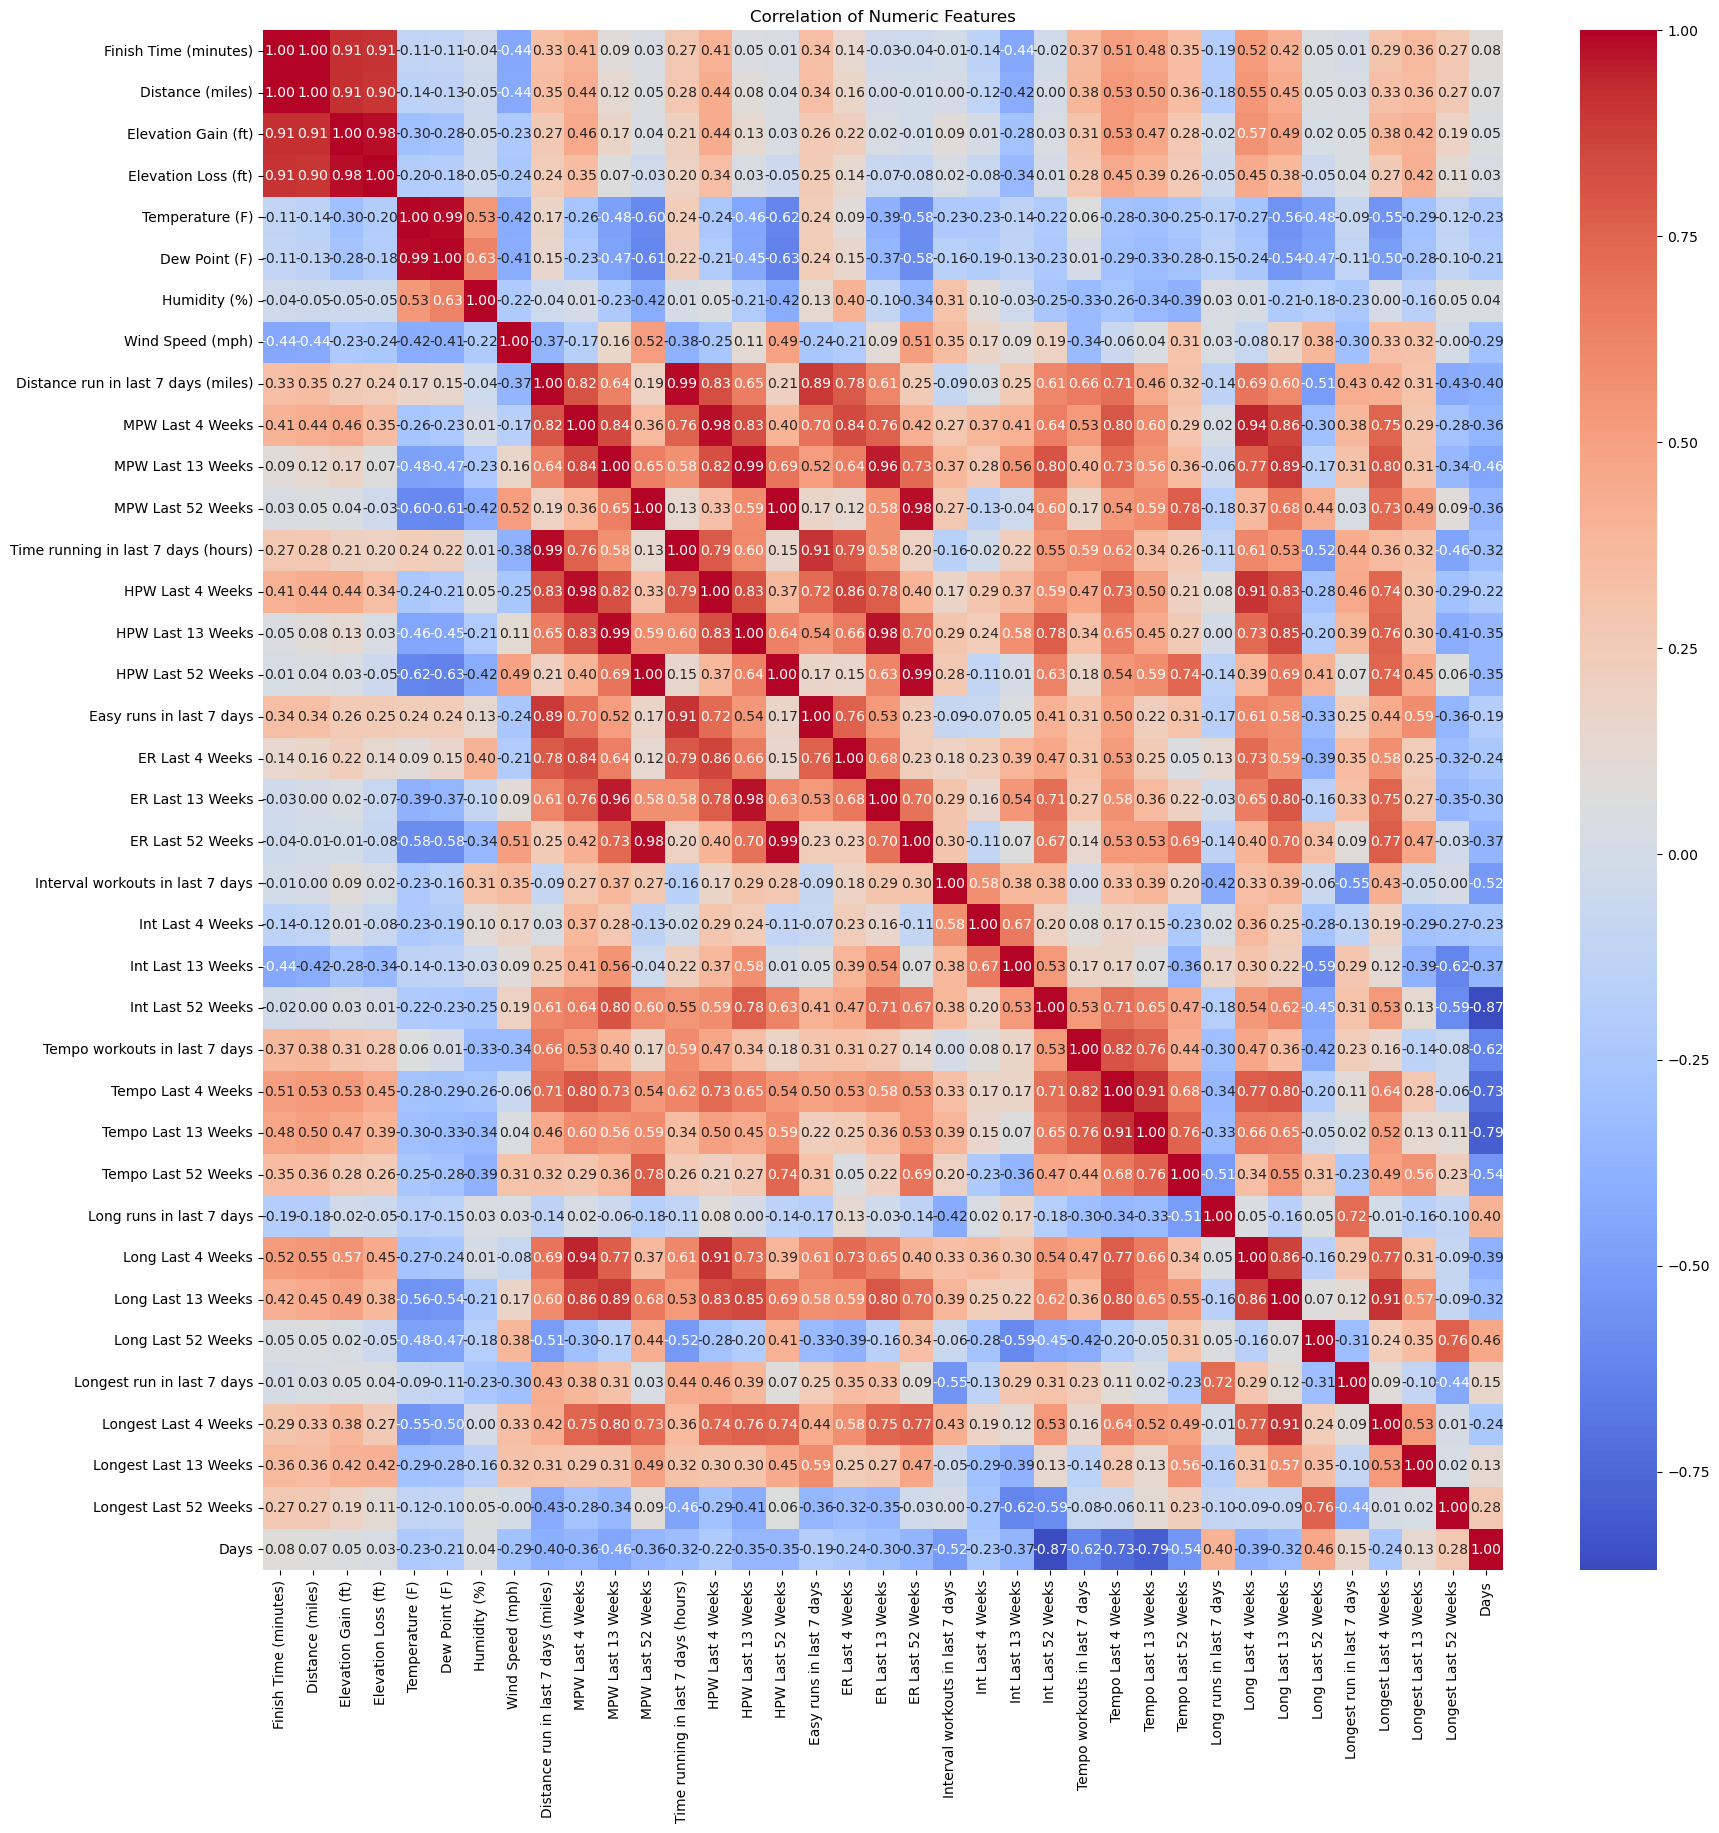

Impact of features on Finish Time (Descending Order):
Distance (miles)                       0.998935
Elevation Gain (ft)                    0.913559
Elevation Loss (ft)                    0.905559
Long Last 4 Weeks                      0.520519
Tempo Last 4 Weeks                     0.508102
Tempo Last 13 Weeks                    0.479701
Long Last 13 Weeks                     0.418895
HPW Last 4 Weeks                       0.410501
MPW Last 4 Weeks                       0.407791
Tempo workouts in last 7 days          0.367282
Longest Last 13 Weeks                  0.359322
Tempo Last 52 Weeks                    0.352425
Easy runs in last 7 days               0.337700
Distance run in last 7 days (miles)    0.334148
Longest Last 4 Weeks                   0.293593
Time running in last 7 days (hours)    0.273857
Longest Last 52 Weeks                  0.270514
ER Last 4 Weeks                        0.144172
MPW Last 13 Weeks                      0.089233
Days                              

In [14]:
# Data Cleaning and Preprocessing

# Drop the first row (title )NaN values across all columns
cleaned_data = Prof_race_data.dropna(how='all')
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], errors='coerce', infer_datetime_format=True)

cleaned_data['Days'] = (cleaned_data['Date'] - cleaned_data['Date'].min()).dt.days
# Select only numeric columns for correlation calculation
numeric_data = cleaned_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Numeric Features')
plt.show()


correlation_matrix

# Extract correlation values of 'Finish Time' column with other features
finish_time_correlation = correlation_matrix['Finish Time (minutes)'].drop('Finish Time (minutes)').sort_values(ascending=False)

# Display the correlation values in descending order
print("Impact of features on Finish Time (Descending Order):")
print(finish_time_correlation)


Data features

In [15]:
# Extract features and target variable
X = cleaned_data[['Distance (miles)', 'Elevation Gain (ft)', 'Elevation Loss (ft)']].values
y = cleaned_data['Finish Time (minutes)'].values

Test (Least Square Estimate, Ridge Regressian Estimate)

In [16]:
# Define functionf for computing least squares estimate
def least_squares_est(X, y):
    n = X.shape[0]
    d = X.shape[1]
    A = np.zeros((n, d+1))
    A[:,0] = np.ones(n)
    A[:,1:] = X
    theta = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, y))
    return theta

# Define function for computing ridge regression estimate
def ridge_reg_est(X,y,lam):
    n = X.shape[0]
    d = X.shape[1]
    A = np.zeros((n,d+1))
    A[:,0] = np.ones(n)
    A[:,1:] = X
    Gam = np.zeros((d+1,d+1))
    np.fill_diagonal(Gam,lam)
    Gam[0,0] = 0.0
    theta = np.dot(np.linalg.inv(np.dot(A.T,A)+Gam),np.dot(A.T,y))
    return theta

# Define function for applying least squares/ridge regression estimate
def lin_reg_appl(X,theta):
    n = X.shape[0]
    d = X.shape[1]
    A = np.zeros((n,d+1))
    A[:,0] = np.ones(n)
    A[:,1:] = X
    y = np.dot(A,theta)
    return y


theta = least_squares_est(X, y)
# New data for prediction
new_data = {
    'Distance (miles)': 3.1,
    'Elevation Gain (ft)': 198,
    'Elevation Loss (ft)': 197,
}

# Extract features from new data
new_data_features = np.array([
    new_data['Distance (miles)'],
    new_data['Elevation Gain (ft)'],
    new_data['Elevation Loss (ft)'],
]).reshape(1, -1)  # Reshape to match the shape expected by the model

# Prediction
predicted_finish_time_minutes = lin_reg_appl(new_data_features, theta)
predicted_finish_time_seconds = predicted_finish_time_minutes * 60  # Convert minutes to seconds

# Calculate minutes and seconds
predicted_minutes = int(predicted_finish_time_seconds // 60)
predicted_seconds = int(predicted_finish_time_seconds % 60)

# Print or use predicted_minutes and predicted_seconds as needed
print("Predicted Finish Time: {} minutes {} seconds".format(predicted_minutes, predicted_seconds))

Predicted Finish Time: 18 minutes 15 seconds


In [22]:

def confidence_interval(prediction, se_estimate, n, alpha=0.05):
    # Find the degrees of freedom
    dof = n - 1

    # Find the critical value from the t-distribution
    t_critical = abs(scipy.stats.t.ppf(alpha / 2, dof))

    # Calculate the margin of error
    margin_of_error = t_critical * se_estimate

    # Calculate the lower and upper bounds of the confidence interval
    lower_bound = prediction - margin_of_error
    upper_bound = prediction + margin_of_error
    
    return lower_bound, upper_bound

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize training and testing data
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_train_std = (X_train - mu) / sigma
X_test_std = (X_test - mu) / sigma

# Fit the model using least squares on the training data
theta_hat = least_squares_est(X_train_std, y_train)

# Make predictions on the testing data
y_hat = lin_reg_appl(X_test_std, theta_hat)

# Calculate MSE for your model
mse = np.mean((y_test - y_hat) ** 2)
print('MSE for your model:', mse)
se_estimate = np.sqrt(mse)

# Calculate the predicted finish time for the test data
predicted_finish_time_seconds_test = lin_reg_appl(X_test_std, theta_hat) * 60
n_test = X_test_std.shape[0]
print("Number of samples (n_test):", n_test)

# Calculate the confidence interval for the test data
lower_bound_test, upper_bound_test = confidence_interval(predicted_finish_time_seconds_test, se_estimate, n_test)

# Find the prediction with the highest confidence interval
max_confidence_index = np.argmax(upper_bound_test - lower_bound_test)
max_confidence_lower_bound = lower_bound_test[max_confidence_index]
max_confidence_upper_bound = upper_bound_test[max_confidence_index]

# Convert seconds to minutes and seconds for the highest confidence interval
max_confidence_lower_minutes = int(max_confidence_lower_bound // 60)
max_confidence_lower_seconds = int(max_confidence_lower_bound % 60)
max_confidence_upper_minutes = int(max_confidence_upper_bound // 60)
max_confidence_upper_seconds = int(max_confidence_upper_bound % 60)

# Print the prediction with the highest confidence interval
print("Prediction with Highest Confidence Interval:")
print("Lower Bound: {} minutes {} seconds".format(max_confidence_lower_minutes, max_confidence_lower_seconds))
print("Upper Bound: {} minutes {} seconds".format(max_confidence_upper_minutes, max_confidence_upper_seconds))

# Print predicted finish times with minutes and seconds
print("\nPredicted Finish Times:")
for time_in_minutes in y_hat:
    minutes = int(time_in_minutes)
    seconds = int((time_in_minutes - minutes) * 60)
    print("{} minutes {} seconds".format(minutes, seconds))

# print("Actual Finish Times (minutes):", y_test)



MSE for your model: 3.3141614323530018
Number of samples (n_test): 3
Prediction with Highest Confidence Interval:
Lower Bound: 18 minutes 7 seconds
Upper Bound: 18 minutes 23 seconds

Predicted Finish Times:
18 minutes 15 seconds
38 minutes 16 seconds
18 minutes 4 seconds


Ridge Regression

In [23]:
def confidence_interval(prediction, se_estimate, n, alpha=0.05):
    # Find the degrees of freedom
    dof = n - 1

    # Find the critical value from the t-distribution
    t_critical = abs(scipy.stats.t.ppf(alpha / 2, dof))

    # Calculate the margin of error
    margin_of_error = t_critical * se_estimate

    # Calculate the lower and upper bounds of the confidence interval
    lower_bound = prediction - margin_of_error
    upper_bound = prediction + margin_of_error
    
    return lower_bound, upper_bound

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize training and testing data
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_train_std = (X_train - mu) / sigma
X_test_std = (X_test - mu) / sigma




Lasso

Mean Squared Error: 936.1475408644017
Predicted Finish Time:
28 minutes 6 seconds
Confidence Interval:
Lower Bound: 23 minutes
Upper Bound: 33 minutes


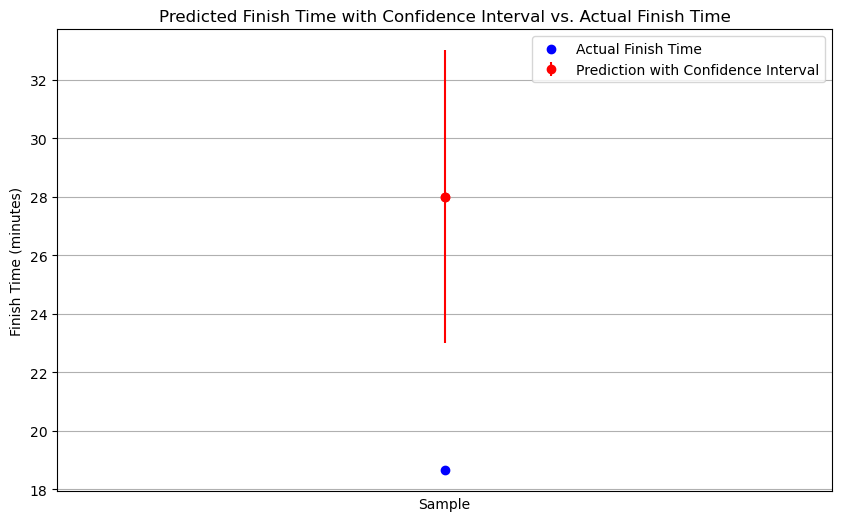

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv("C:/Users/hoonf/OneDrive/Documents/ECE 6254/Data Challenge/race_results.csv")

# Drop rows with missing values
data.dropna(inplace=True)

# Select features and target variable
X = data.drop(columns=["Finish Time (minutes)"])
y = data["Finish Time (minutes)"]

# Identify categorical columns for one-hot encoding
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

# Apply one-hot encoding to categorical columns and handle missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['number']).columns)
    ], remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

# Initialize and train the model (Gradient Boosting Regression)
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train_enc, y_train)

# Make predictions
y_pred = model.predict(X_test_enc)

# Calculate mean squared error (for evaluation)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


# Convert predicted finish time from minutes to minutes and seconds
predicted_minutes = int(y_pred[0])  # Assuming y_pred is a 1D array
predicted_seconds = int((y_pred[0] - predicted_minutes) * 60)

# Define confidence interval (e.g., +/- 5 minutes)
confidence_interval = 5  # You can adjust this value as needed

# Calculate lower and upper bounds of the confidence interval
lower_bound = predicted_minutes - confidence_interval
upper_bound = predicted_minutes + confidence_interval

# Display the prediction in the specified format
print("Predicted Finish Time:")
print(f"{predicted_minutes} minutes {predicted_seconds} seconds")
print("Confidence Interval:")
print(f"Lower Bound: {lower_bound} minutes")
print(f"Upper Bound: {upper_bound} minutes")



# Plot the predicted finish time and confidence interval
plt.figure(figsize=(10, 6))
plt.errorbar(1, predicted_minutes, yerr=[[predicted_minutes - lower_bound], [upper_bound - predicted_minutes]], fmt='o', color='red', label='Prediction with Confidence Interval')
plt.scatter(1, predicted_minutes, color='red')
plt.scatter(1, y_test.iloc[0], color='blue', label='Actual Finish Time')
plt.title('Predicted Finish Time with Confidence Interval vs. Actual Finish Time')
plt.xlabel('Sample')
plt.ylabel('Finish Time (minutes)')
plt.legend()
plt.xticks([])
plt.xlim(0.5, 1.5)
plt.grid(True)
plt.show()